In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from  PIL import Image
import os
import cv2

# predicted_label_dir = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Yolo/predict/wb_small_airshed_obb_v_297_150__320_100/wb/labels'
# ground_truth_label_dir = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/data/processed_data/wb_small_airshed/labels'
# images_path = glob('/home/shataxi.dubey/shataxi_work/vlm_on_planet/data/processed_data/wb_small_airshed/images/*')

predicted_label_dir = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Yolo/runs/lucknow_obb_v_297_150__320_100_batch32/labels'
ground_truth_label_dir = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/lucknow_train_test_split/test/labels'
images_path = glob('/home/shataxi.dubey/shataxi_work/vlm_on_planet/lucknow_train_test_split/test/images/*')

In [56]:
targets = []
predictions = []
images = []

for image_path in sorted(images_path):
    image_name = os.path.basename(image_path)

    ground_truth_label_path = os.path.join(ground_truth_label_dir, image_name[:-3]+'txt')
    predicted_label_path = os.path.join(predicted_label_dir, image_name[:-3]+'txt')

    if os.path.exists(ground_truth_label_path) or os.path.exists(predicted_label_path):

        if os.path.exists(ground_truth_label_path):
            images.append(Image.open(image_path))
            bbox = np.loadtxt(ground_truth_label_path, ndmin = 2)
            bbox[:,0] = 0
            targets.append(bbox)

            if os.path.exists(predicted_label_path):
                bbox = np.loadtxt(predicted_label_path, ndmin = 2)
                predictions.append(bbox)
            else:
                bbox = np.zeros((1,9))
                bbox[:,0] = 1
                predictions.append(bbox)   
    

In [57]:
len(images), len(targets), len(predictions)

(75, 75, 75)

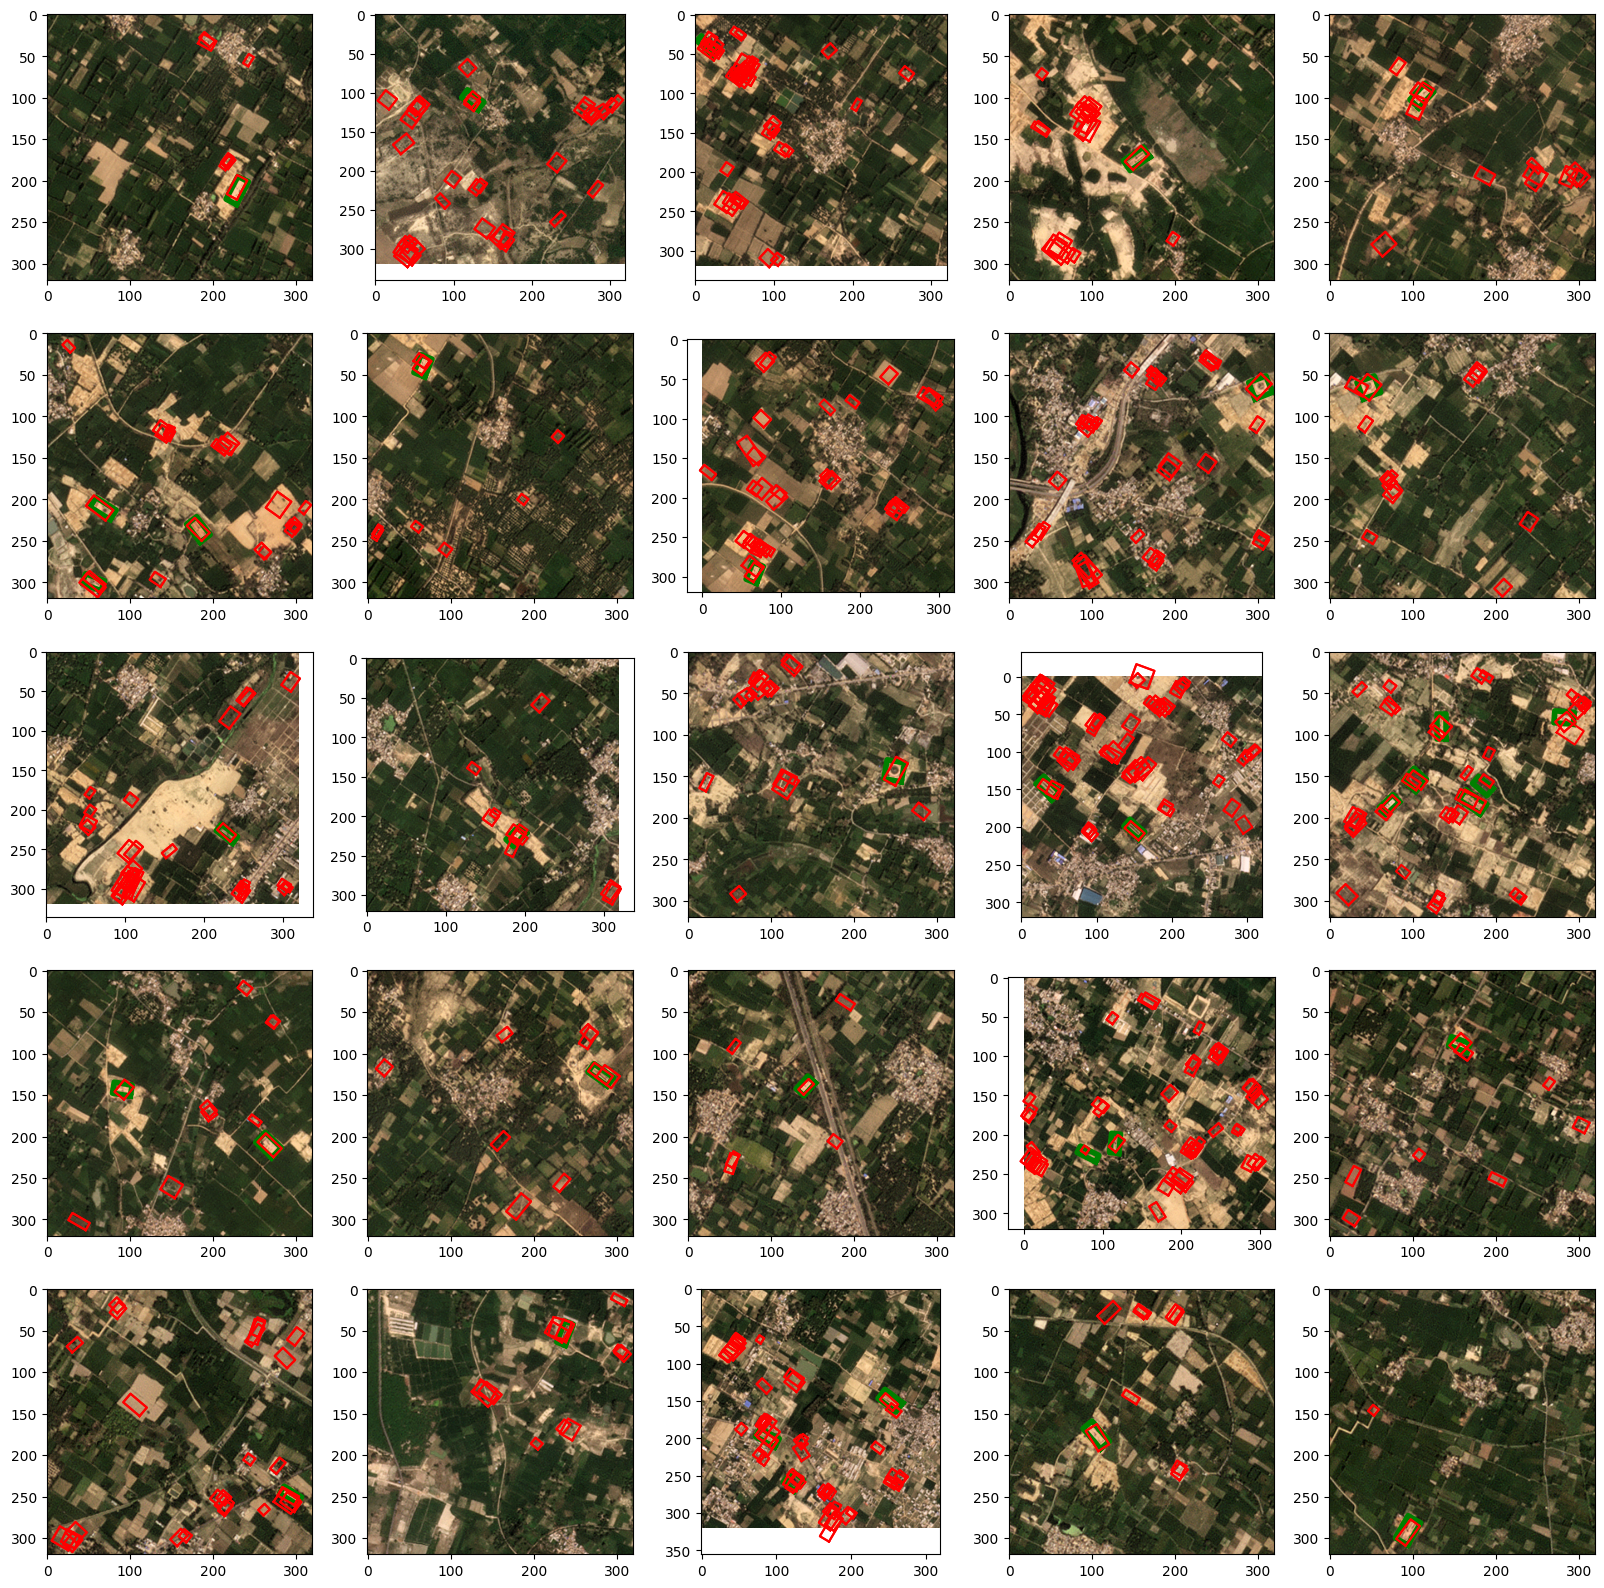

In [58]:
annotated_images = []

fig, ax = plt.subplots(figsize = (20,20), nrows = 5,ncols = 5)
ax = ax.flatten()
for i in range(0,25):
    image = images[i]
    detections = predictions[i]
    target = targets[i]
    ax[i].imshow(image)
    for bbox in target:
        bbox = bbox*image.size[0]
        ax[i].plot(bbox[[1,3,5,7,1]],bbox[[2,4,6,8,2]], color = 'green', linewidth = '4')
    for bbox in detections:
        bbox = bbox*image.size[0]
        ax[i].plot(bbox[[1,3,5,7,1]],bbox[[2,4,6,8,2]], color = 'red')
